In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [5]:
X,y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X /255.0

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.7)

In [9]:
import pandas as pd

In [11]:
data = pd.DataFrame(X)
data.insert(784, "label", y)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [12]:
import matplotlib.pyplot as plt

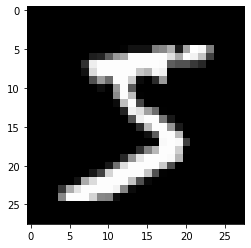

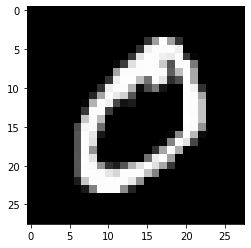

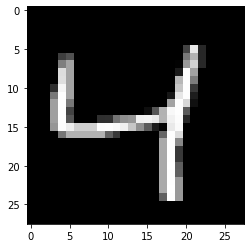

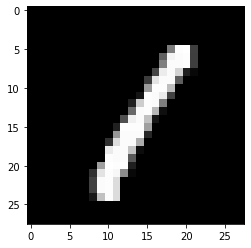

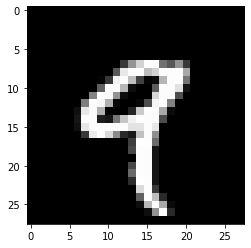

In [16]:
for i in range(5):
    plt.imshow(X[i].reshape((28,28)), cmap="gray")
    plt.show()

In [17]:
from sklearn.neural_network import MLPClassifier

In [20]:
mlp = MLPClassifier(hidden_layer_sizes=1, activation="logistic")
mlp1 = MLPClassifier(hidden_layer_sizes=10, activation="logistic")
mlp2 = MLPClassifier(hidden_layer_sizes=100, activation="logistic")

In [21]:
mlp.fit(X_train,y_train)
mlp1.fit(X_train,y_train)
mlp2.fit(X_train,y_train)

C:\Users\44778\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\44778\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=100)

In [22]:
predictions_NN = mlp.predict(X_test)
predictions_NN

array(['0', '4', '1', ..., '3', '3', '0'], dtype='<U1')

In [23]:
predictions_NN1 = mlp1.predict(X_test)
predictions_NN1

array(['8', '4', '8', ..., '0', '5', '3'], dtype='<U1')

In [24]:
predictions_NN2 = mlp2.predict(X_test)
predictions_NN2

array(['8', '4', '8', ..., '0', '6', '3'], dtype='<U1')

Actual Value:4
Predcited Value for 1 Hidden Layer:4
Predcited Value for 10 Hidden Layer:4
Predcited Value for 100 Hidden Layer:4


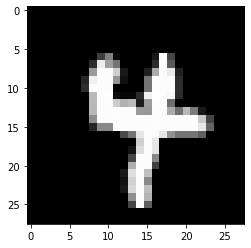

In [27]:
print(f"Actual Value:{y_test[1]}")
print(f"Predcited Value for 1 Hidden Layer:{predictions_NN[1]}")
print(f"Predcited Value for 10 Hidden Layer:{predictions_NN1[1]}")
print(f"Predcited Value for 100 Hidden Layer:{predictions_NN2[1]}")
plt.imshow(X_test[1].reshape((28,28)), cmap="gray")

In [33]:
for i in range(5):
    print(f"Actual Value:{y_test[i]}")
    print(f"Predcited Value for 1 Hidden Layer:{predictions_NN[i]}")
    print(f"Predcited Value for 10 Hidden Layer:{predictions_NN1[i]}")
    print(f"Predcited Value for 100 Hidden Layer:{predictions_NN2[i]}")

Actual Value:8
Predcited Value for 1 Hidden Layer:0
Predcited Value for 10 Hidden Layer:8
Predcited Value for 100 Hidden Layer:8
Actual Value:4
Predcited Value for 1 Hidden Layer:4
Predcited Value for 10 Hidden Layer:4
Predcited Value for 100 Hidden Layer:4
Actual Value:8
Predcited Value for 1 Hidden Layer:1
Predcited Value for 10 Hidden Layer:8
Predcited Value for 100 Hidden Layer:8
Actual Value:7
Predcited Value for 1 Hidden Layer:1
Predcited Value for 10 Hidden Layer:7
Predcited Value for 100 Hidden Layer:7
Actual Value:7
Predcited Value for 1 Hidden Layer:7
Predcited Value for 10 Hidden Layer:7
Predcited Value for 100 Hidden Layer:7


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions_NN)

array([[2468,  211,    0, 1925,   17,    0,    0,   11,  213,   17],
       [  15, 5194,    0,   82,    0,    0,    0,    6,  139,   41],
       [2321,  420,    0, 1673,   49,    0,    0,   62,  299,   65],
       [2054,  375,    0, 2130,   22,    0,    0,   26,  292,   42],
       [   7,  192,    0,   18, 3112,    0,    0, 1017,   10,  362],
       [1109,  478,    0, 2356,   30,    0,    0,   27,  414,   30],
       [  50, 3148,    0,  364,  111,    0,    0,  246,  345,  604],
       [   3,  443,    0,   21, 3628,    0,    0,  573,   29,  447],
       [ 515,  868,    0, 2451,   10,    0,    0,   19,  823,   60],
       [  13,  316,    0,   53, 2753,    0,    0, 1124,   33,  619]],
      dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions_NN1)

array([[4670,    0,   18,   12,   24,   46,   45,   18,   27,    2],
       [   1, 5298,   23,   39,    6,   25,   11,    8,   56,   10],
       [  45,   44, 4409,   64,   63,   30,   60,   92,   71,   11],
       [  36,   19,  116, 4437,   10,  143,    9,   53,   59,   59],
       [   5,   16,   27,    0, 4401,   11,   53,   20,   16,  169],
       [  64,   17,   28,  149,   29, 3944,   71,   21,   63,   58],
       [  59,   21,   56,    3,   46,   50, 4605,    5,   20,    3],
       [  18,   44,   63,   31,   53,   14,    3, 4781,   11,  126],
       [  48,   92,   81,  128,   39,  149,   60,   39, 4055,   55],
       [  31,   18,   13,   69,  162,   35,   10,  132,   20, 4421]],
      dtype=int64)

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions_NN2)

array([[4772,    0,   10,    2,    5,   13,   26,   10,   22,    2],
       [   1, 5387,   19,   12,    6,    6,    7,   16,   18,    5],
       [  16,   16, 4697,   32,   17,   10,   22,   45,   25,    9],
       [   9,   15,   58, 4664,    4,   71,    8,   41,   44,   27],
       [   7,   13,   17,    1, 4522,    3,   27,   18,    9,  101],
       [  19,    3,    9,   52,   21, 4227,   52,    9,   21,   31],
       [  21,    5,   13,    1,   19,   22, 4775,    3,    9,    0],
       [   7,   17,   42,   10,   33,    4,    1, 4993,    3,   34],
       [  13,   39,   27,   34,   11,   39,   30,   16, 4508,   29],
       [  15,    6,    6,   18,   67,   12,    2,   53,   15, 4717]],
      dtype=int64)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_NN))

C:\Users\44778\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.29      0.51      0.37      4862
           1       0.45      0.95      0.61      5477
           2       0.00      0.00      0.00      4889
           3       0.19      0.43      0.27      4941
           4       0.32      0.66      0.43      4718
           5       0.00      0.00      0.00      4444
           6       0.00      0.00      0.00      4868
           7       0.18      0.11      0.14      5144
           8       0.32      0.17      0.22      4746
           9       0.27      0.13      0.17      4911

    accuracy                           0.30     49000
   macro avg       0.20      0.30      0.22     49000
weighted avg       0.21      0.30      0.23     49000



C:\Users\44778\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\44778\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_NN1))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4862
           1       0.95      0.97      0.96      5477
           2       0.91      0.90      0.91      4889
           3       0.90      0.90      0.90      4941
           4       0.91      0.93      0.92      4718
           5       0.89      0.89      0.89      4444
           6       0.93      0.95      0.94      4868
           7       0.92      0.93      0.93      5144
           8       0.92      0.85      0.89      4746
           9       0.90      0.90      0.90      4911

    accuracy                           0.92     49000
   macro avg       0.92      0.92      0.92     49000
weighted avg       0.92      0.92      0.92     49000



In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_NN2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4862
           1       0.98      0.98      0.98      5477
           2       0.96      0.96      0.96      4889
           3       0.97      0.94      0.96      4941
           4       0.96      0.96      0.96      4718
           5       0.96      0.95      0.96      4444
           6       0.96      0.98      0.97      4868
           7       0.96      0.97      0.97      5144
           8       0.96      0.95      0.96      4746
           9       0.95      0.96      0.96      4911

    accuracy                           0.96     49000
   macro avg       0.96      0.96      0.96     49000
weighted avg       0.96      0.96      0.96     49000



- More hidden layer better accuracy